In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
import pickle

In [2]:
# Read data
df = pd.read_csv('./homework/tekoäly_oppimistehtävä/datasets/fish_data.csv')

# Drop rows with missing values
df = df.dropna()

# Sample of 10 rows
print('Sample of 10 rows:')
print(df.sample(10))

y = df['life_span']
X = df[['average_length(inches))',
        'average_weight(inches))',
        'habitat',
        'color',
        'ph_of_water',
        'Gender' # true = male, false = female
        ]]

y = y.values.reshape(-1, 1)

Sample of 10 rows:
        id  average_length(inches))  average_weight(inches))  \
1984  1985                    14.87                     6.92   
615    616                    17.11                     8.17   
482    483                     2.32                     9.02   
621    622                     9.80                     6.74   
93      94                    13.68                     3.48   
192    193                    16.48                     8.96   
289    290                     6.40                    11.75   
1091  1092                    18.13                    14.35   
89      90                     1.11                    13.61   
1749  1750                    18.25                    17.52   

               habitat  ph_of_water                   color Gender  life_span  
1984             lakes          7.5        Black_and_Orange   True       20.7  
615             rivers          6.3                   White  False       11.5  
482   slowmovingwaters          7.2 

In [3]:
# Statistics
print('Statistics:')
print(X.describe())

# Info
print('Info:')
print(X.info())


Statistics:
       average_length(inches))  average_weight(inches))  ph_of_water
count              1976.000000              1976.000000  1976.000000
mean                 10.557586                10.449297     7.014727
std                   5.525760                 4.898631     0.577608
min                   1.000000                 2.000000     6.000000
25%                   5.850000                 6.127500     6.500000
50%                  10.680000                10.455000     7.000000
75%                  15.172500                14.700000     7.500000
max                  20.000000                18.960000     8.000000
Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1976 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   average_length(inches))  1976 non-null   float64
 1   average_weight(inches))  1976 non-null   float64
 2   habitat                  1976 non-null 

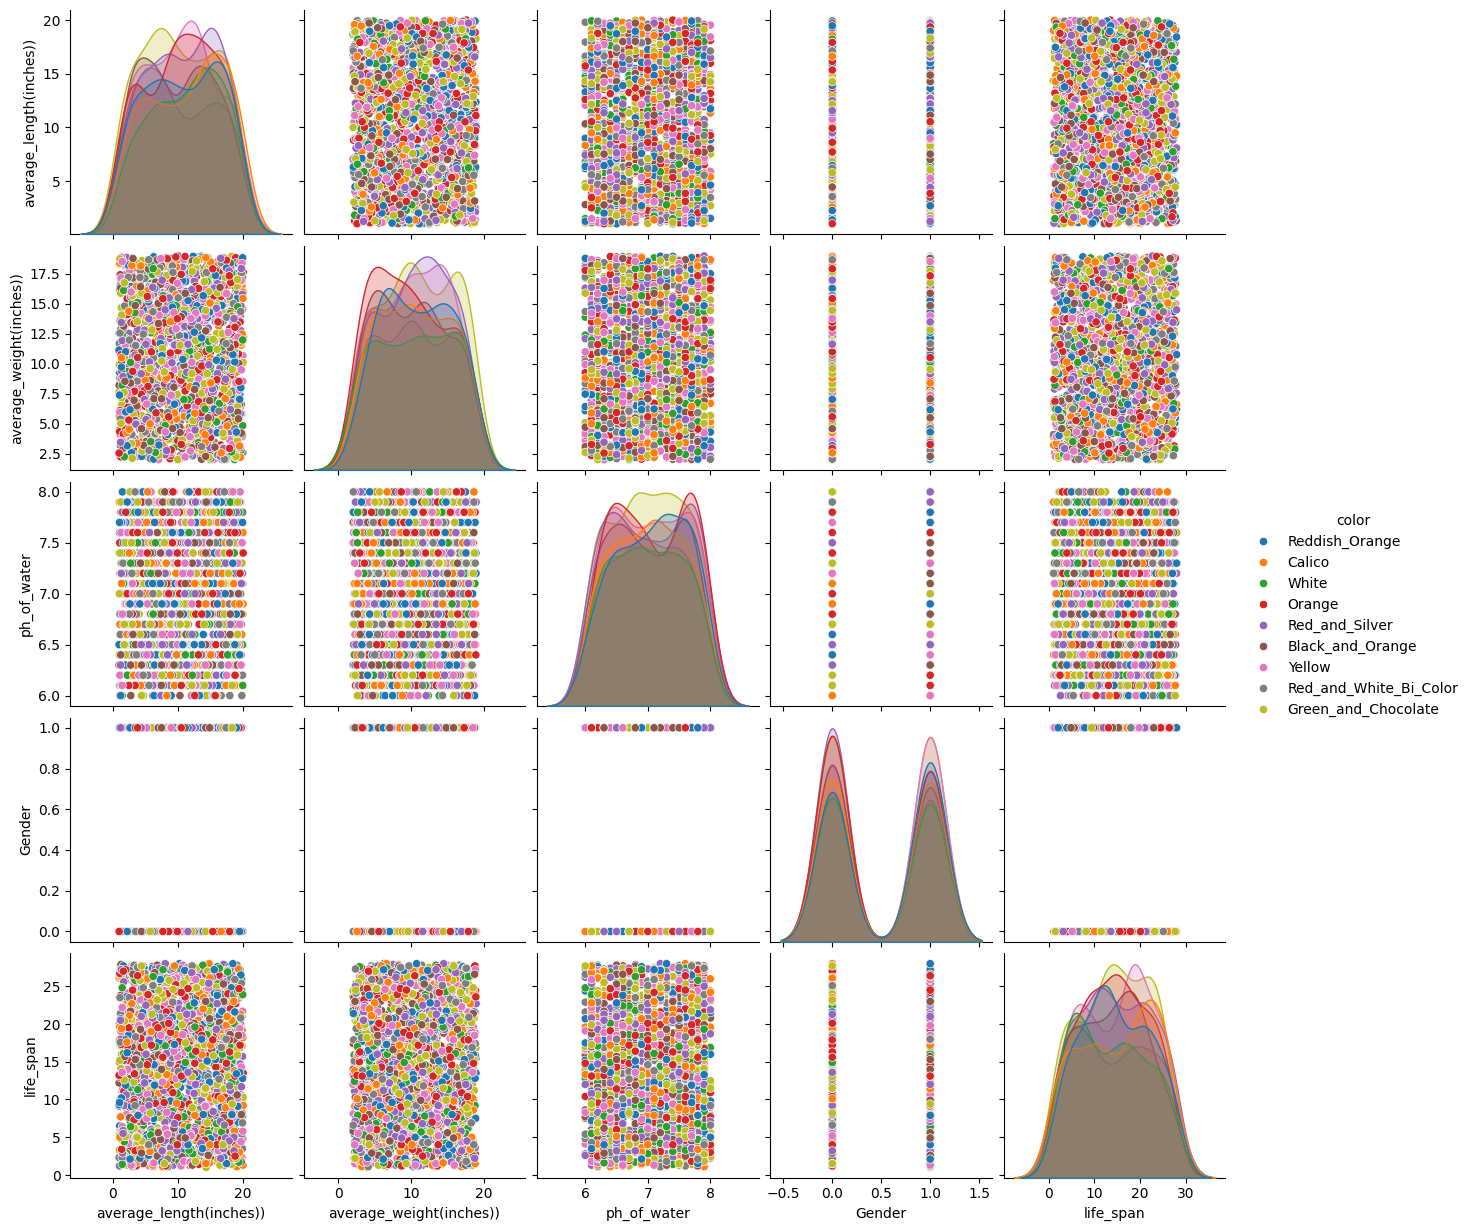

In [4]:
# Pairplot
df = df.drop(['id'], axis=1)
sns.pairplot(df, hue='color')

In [5]:
# One hot encoding
X_org = X
ct = ColumnTransformer(transformers=[('encoder',
OneHotEncoder(drop='first'), ['habitat', 'color', 'Gender'])], remainder='passthrough')
X = ct.fit_transform(X)

In [6]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 0)

In [7]:
# Scale data
scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

ValueError: Expected 2D array, got 1D array instead:
array=[ 2.   1.5  2.  ...  7.4 27.9 25.9].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
# Training the Multiple Linear Regression model on the Training set
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predicting the Test set results
y_pred = scaler_y.inverse_transform(model.predict(X_test))
y_test = scaler_y.inverse_transform(y_test)

In [ ]:
# Regression metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mea = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mea)

print(f'r2:  {round(r2,4)}')
print(f'mae: {round(mae,4)}')
print(f'mea: {round(mea,4)}')
print(f'rmse: {round(rmse,4)}')

r2:  -0.0293
mae: 6.4862
mea: 56.5464
rmse: 7.5197


In [ ]:
# Saving model
with open('./homework/tekoäly_oppimistehtävä/models/lifespan-reg.pickle', 'wb') as f:
    pickle.dump(model, f)

# Saving column transformer
with open('./homework/tekoäly_oppimistehtävä/models/lifespan-ct.pickle', 'wb') as f:
    pickle.dump(ct, f)